# Part 1 - Data Preprocessing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training set

In [2]:
dataset_train = pd.read_csv('0050_train.csv')
training_set = dataset_train.iloc[:, 0:1].values

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

## Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## Initialising the RNN

In [7]:
regressor = Sequential()

## Adding  LSTM layer and some Dropout regularisation

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### # Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1440/1440 [==============================] - 14s 9ms/step - loss: 0.0358
Epoch 2/100
1440/1440 [==============================] - 11s 8ms/step - loss: 0.0050
Epoch 3/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0043
Epoch 4/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0042
Epoch 5/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0041
Epoch 6/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0037
Epoch 7/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0045
Epoch 8/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0042
Epoch 9/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0037
Epoch 10/100
1440/1440 [==============================] - 10s 7ms/step - loss: 0.0029
Epoch 11/100
1440/1440 [==============================] - 11s 8ms/step - loss: 0.0035
Epoch 12/100
14

# Part 3 - Making the predictions and visualising the results

## Importing the libraries

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

## Getting the real stock price of 0050

In [16]:
dataset_test = pd.read_csv('0050_test.csv')
real_stock_price = dataset_test.iloc[:, 0:1].values

## Getting the predicted stock price of 0050

In [17]:
dataset_total = pd.concat((dataset_train['nav'], dataset_test['nav']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualising the results

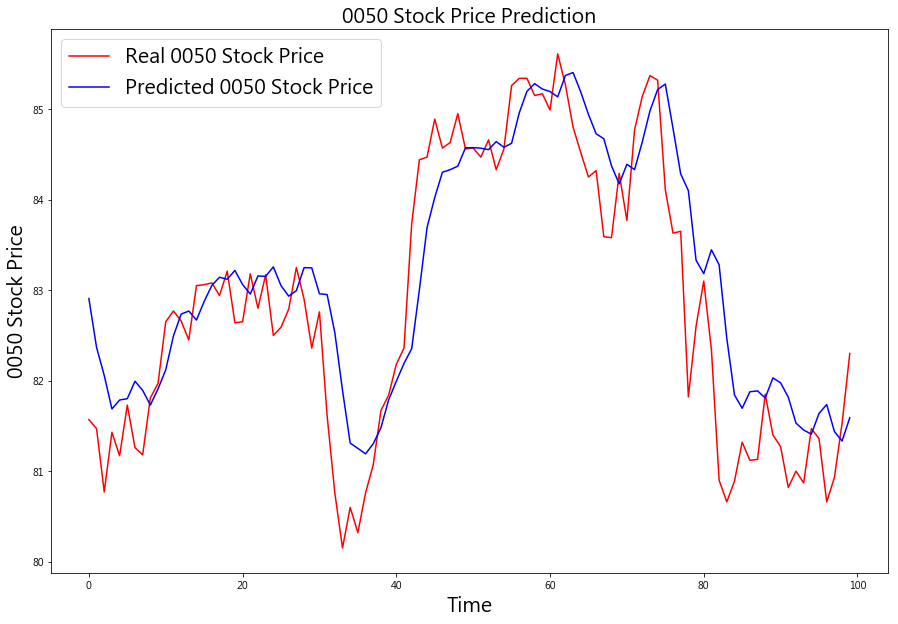

In [20]:
plt.figure(figsize=(15,10))
# plt.plot(pd.DataFrame(real_stock_price).pct_change().iloc[1:].values, color = 'red', label = 'Real 0050 Stock Price')
# plt.plot(pd.DataFrame(predicted_stock_price).pct_change().iloc[1:].values, color = 'blue', label = 'Predicted 0050 Stock Price')
plt.plot(real_stock_price, color = 'red', label = 'Real 0050 Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted 0050 Stock Price')
plt.title('0050 Stock Price Prediction', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('0050 Stock Price', fontsize=20)
plt.legend(fontsize=20)
plt.show()